# **(Healthcare insurance cost analysis)**

## Objectives

* Load and explore the cleaned healthcare insurance dataset.

* Engineer BMI categories to better analyse the impact on insurance charges.

* Perform exploratory data analysis (EDA) to identify key factors influencing insurance costs, such as smoking status, BMI, age, and region.

* Visualise relationships using Plotly, Seaborn, and Matplotlib to gain insights and prepare for predictive modelling.

## Inputs

* Cleaned healthcare insurance dataset CSV file (e.g., data/insurance_cleaned.csv) containing personal and geographic attributes along with insurance charges.

## Outputs

* Interactive and static visualisations demonstrating data distributions and relationships (e.g., bar plots, boxplots, scatter plots, correlation heatmaps).

* New feature column bmi_category added to the dataset for categorical analysis.

* Insightful summary of variables affecting insurance charges to inform further modelling steps.

## Additional Comments

* This notebook focuses on initial data understanding and visualisation; predictive modelling will be developed in subsequent notebooks.

* Assumes data has been cleaned and preprocessed in a prior ETL step (etl.py or similar).

* Plotly is included for interactivity, improving exploratory analysis and presentation.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1- Extracting Data 

Section 1 content:

* Imported the necessary Python libraries for data analysis and visualisation, including pandas, NumPy, Matplotlib, Seaborn, and Plotly.

* Loaded the dataset from the designated data folder.

* Examined the first few rows of the dataset to gain an initial understanding of its structure.

* Reviewed the data types and count of non-null values in each column using the .info() method.

* Obtained summary statistics of the numerical variables with the .describe() method to better understand data distributions.

Import the packages

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

Extract the data

In [35]:
df = pd.read_csv('../data/cleaned_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,Overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,Obese
2,28,0,33.000,3,0,4449.46200,False,True,False,Obese
3,33,0,22.705,0,0,21984.47061,True,False,False,Normal
4,32,0,28.880,0,0,3866.85520,True,False,False,Overweight


Find out basic information about the data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
 9   bmi_category      1337 non-null   object 
dtypes: bool(3), float64(2), int64(4), object(1)
memory usage: 77.2+ KB


In [37]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Section 2- Transforming Data 

In this section, I carried out data cleaning and preparation by:

* Verifying that there were no missing values using .isnull().sum().

* Identifying and removing duplicate records to ensure data quality if neccessary. 

Check for any missing data

In [38]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
bmi_category        0
dtype: int64

Check for duplicate rows

In [39]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


# Section 3- Data Visualisation

In this section, I produced a series of visualisations to explore the three initial hypotheses. These charts are intended to reveal patterns and insights within the dataset, using tools such as Seaborn, Matplotlib, and Plotly. Each visualisation is specifically designed to support or challenge one of the hypotheses outlined at the beginning of the project.



# 1. How does BMI impact insurance charges?

We will categorise BMI into groups and compare the average insurance charges among these groups.

* Define BMI categories 

---

In [40]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

* Show count of each BMI category to verify

In [41]:
df['bmi_category'].value_counts()

bmi_category
Obese            706
Overweight       386
Normal weight    225
Underweight       20
Name: count, dtype: int64

* Visualise average insurance charges by BMI category using Seaborn barplot

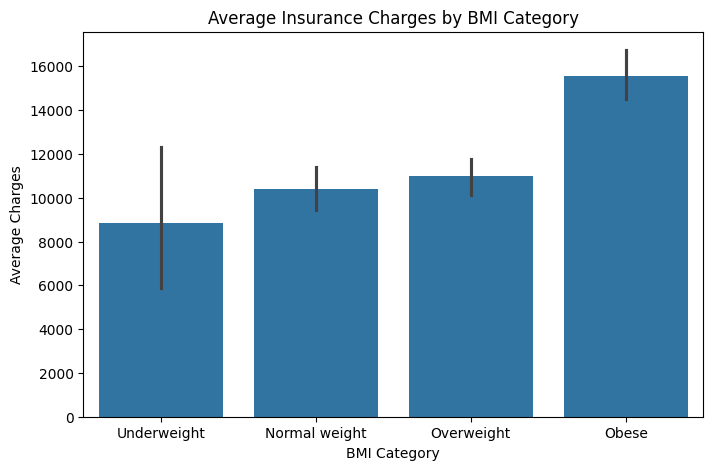

In [42]:
plt.figure(figsize=(8,5))
order = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
sns.barplot(x='bmi_category', y='charges', data=df, order=order)
plt.title('Average Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.show()

# 2. How do insurance charges differ between smokers and non-smokers?

* We will compare the average insurance charges between smokers and non-smokers using bar plots and boxplots.

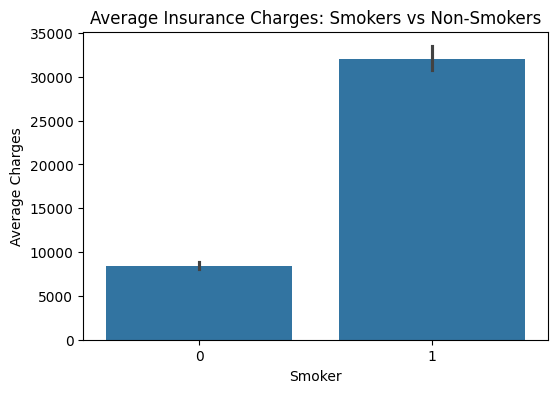

In [43]:
# Barplot of average charges by smoker status (Seaborn)
plt.figure(figsize=(6,4))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Average Insurance Charges: Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()

<Figure size 600x400 with 0 Axes>

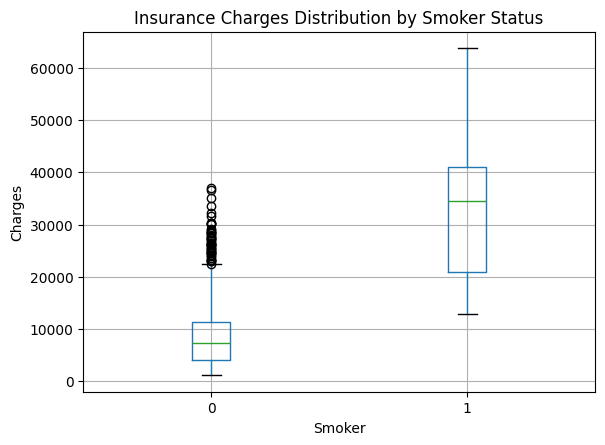

In [44]:
# Boxplot of charges by smoker status (Matplotlib boxplot)
plt.figure(figsize=(6,4))
df.boxplot(column='charges', by='smoker')
plt.title('Insurance Charges Distribution by Smoker Status')
plt.suptitle('')  # Remove default title
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# 3. Which variables have the strongest influence on insurance charges?

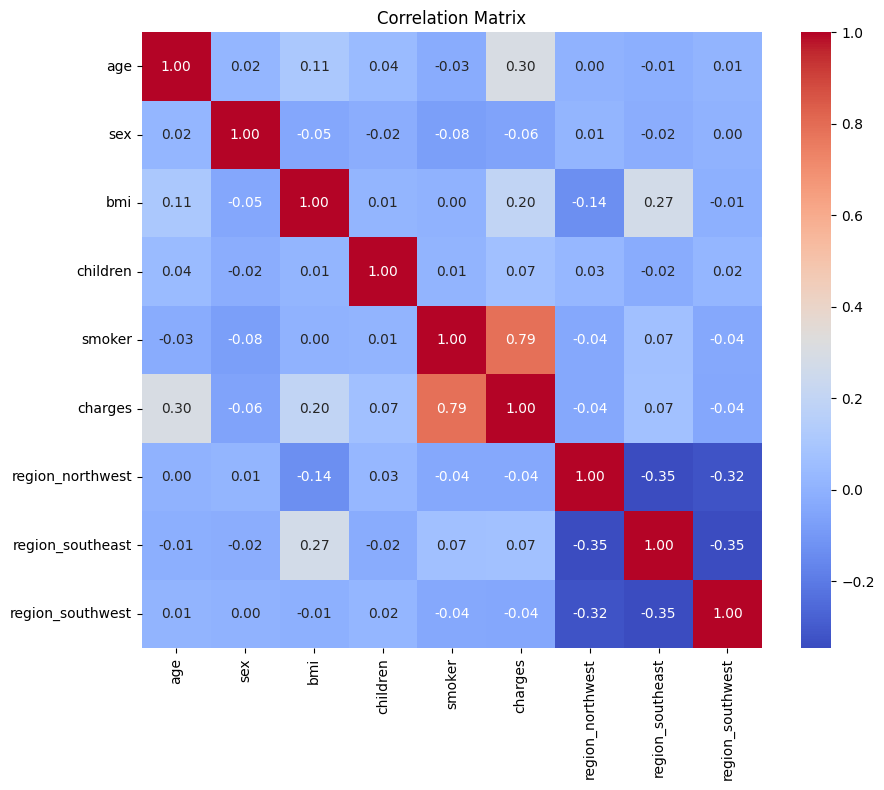

In [45]:
# Correlation heatmap (Seaborn)
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['number', 'bool'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Install required packages if not already installed
%pip install nbformat

# Scatter plot of Age vs Charges (Plotly for interactivity)
fig = px.scatter(df, x='age', y='charges', title='Age vs Insurance Charges',
                 labels={'age':'Age', 'charges':'Insurance Charges'}, trendline='ols')
fig.show()

Note: you may need to restart the kernel to use updated packages.


/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

divide by zero encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

overflow encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

invalid value encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1723: RuntimeWarning:

divide by zero encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1723: RuntimeWarning:

overflow encountered in dot

/Users/nasraibra

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

* We will analyse the correlation matrix and create scatter plots for key variables strongly correlated with charges.

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)